# Intro to Autoencoders

## Import TensorFlow and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
#from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashon MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder



In [33]:
input = layers.Input(shape=(784))
x = layers.Dense(300,activation = 'relu')(input)
#x = layers.Dropout(0.3)(x)
x = layers.Dense(150,activation = 'relu')(x)
#x = layers.Dropout(0.3)(x)
x = layers.Dense(100,activation = 'relu')(x)
#x = layers.Dropout(0.3)(x)
code = layers.Dense(64,activation = 'relu')(x)
x = layers.Dense(100,activation = 'relu')(code)
#x = layers.Dropout(0.3)(x)
x = layers.Dense(150,activation = 'relu')(x)
#x = layers.Dropout(0.3)(x)
x = layers.Dense(300,activation = 'relu')(x)
output = layers.Dense(784,activation = 'relu')(x)

autoencoder = Model(input,output)

autoencoder.summary()
#tf.keras.utils.plot_model(autoencoder)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_60 (Dense)            (None, 300)               235500    
                                                                 
 dropout_39 (Dropout)        (None, 300)               0         
                                                                 
 dense_61 (Dense)            (None, 150)               45150     
                                                                 
 dropout_40 (Dropout)        (None, 150)               0         
                                                                 
 dense_62 (Dense)            (None, 100)               15100     
                                                                 
 dropout_41 (Dropout)        (None, 100)               0   

In [34]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [35]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1566 - val_loss: 0.1233
Epoch 2/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1182 - val_loss: 0.1038
Epoch 3/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1048 - val_loss: 0.0983
Epoch 4/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0987 - val_loss: 0.0972
Epoch 5/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0954 - val_loss: 0.0968
Epoch 6/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0935 - val_loss: 0.0967
Epoch 7/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0920 - val_loss: 0.0968
Epoch 8/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0911 - val_loss: 0.0964
Epoch 9/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0903 - val_loss: 0.0959
Epoch 10/30
1875/1875 [==============================] - 13s 7ms/step - l

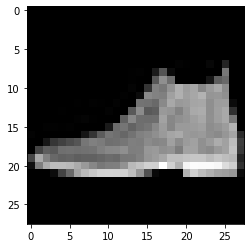

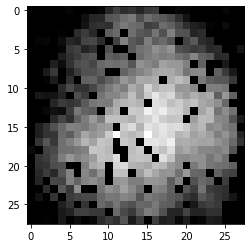

In [36]:
reconstructed = autoencoder.predict(x_test)
plt.imshow(x_test[0].reshape(28,28)*255)
plt.show()
plt.imshow(reconstructed[0].reshape(28,28)*255)
plt.show()

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28,28)*255)
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstructed[i].reshape(28,28)*255)
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Denoising Autoencoder**

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

Adding random noise to the images

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


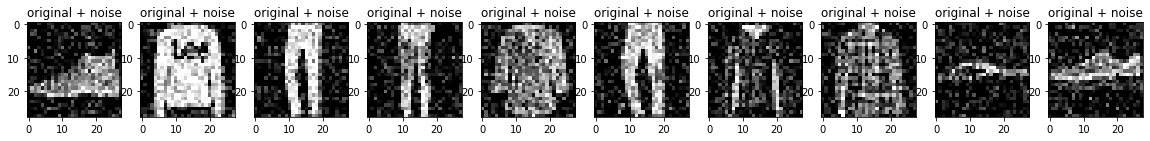

In [11]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [12]:
autoencoder= tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])


In [13]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [14]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1127/1875 [=================>............] - ETA: 30s - loss: 0.0240

KeyboardInterrupt: 

In [ ]:
reconstructed = autoencoder.predict(x_test_noisy)
plt.imshow(tf.squeeze(x_test_noisy[0]))
plt.show()
plt.imshow(tf.squeeze(reconstructed[0]))
plt.show()

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(reconstructed[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()